In [1]:
import pandas as pd
df = pd.read_excel('DEMO15_최종(추추가.xlsx')

In [2]:
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
import re
import time

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

from sklearn.datasets import load_iris
from sklearn import datasets

import cx_Oracle

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import xgboost    #1.7.5버전
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import STATUS_OK

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib


# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고자 하는 한글 폰트 경로 지정
font_prop = fm.FontProperties(fname=font_path)
matplotlib.rc('font', family=font_prop.get_name())

In [4]:
df.fillna(0, inplace=True) # 널값을 모두 0 으로

In [6]:
df_encoded = pd.get_dummies(df[['연령대', '거주지역']])
df = pd.concat([df, df_encoded], axis=1)

In [5]:
# 이분활인것은 요런식으로~
#성별 F가 더 더 벌어주니까 1로 만들어놈, 멤버십 X 도 같은거


df['성별'] = df['성별'].apply(lambda x: 1 if x == 'F' else 0)
df['멤버십'] = df['멤버십'].apply(lambda x: 1 if x == 'X' else 0)
df['고객유형'] = df['고객유형'].apply(lambda x: 1 if x == '충성고객' else 0)


In [7]:
df['남성_학생층'] = (df['연령대_학생층'] == 1) & (df['성별'] == 0)
df['여성_학생층'] = (df['연령대_학생층'] == 1) & (df['성별'] == 1)
df['남성_청년층'] = (df['연령대_청년층'] == 1) & (df['성별'] == 0)
df['여성_청년층'] = (df['연령대_청년층'] == 1) & (df['성별'] == 1)

df['남성_학생층'] = df['남성_학생층'].astype(int)
df['여성_학생층'] = df['여성_학생층'].astype(int)
df['남성_청년층'] = df['남성_청년층'].astype(int)
df['여성_청년층'] = df['여성_청년층'].astype(int)


In [8]:
df['남성_중년층'] = (df['연령대_중년층'] == 1) & (df['성별'] == 0)
df['여성_중년층'] = (df['연령대_중년층'] == 1) & (df['성별'] == 1)
df['남성_노년층'] = (df['연령대_노년층'] == 1) & (df['성별'] == 0)
df['여성_노년층'] = (df['연령대_노년층'] == 1) & (df['성별'] == 1)

df['남성_중년층'] = df['남성_중년층'].astype(int)
df['여성_중년층'] = df['여성_중년층'].astype(int)
df['남성_노년층'] = df['남성_노년층'].astype(int)
df['여성_노년층'] = df['여성_노년층'].astype(int)


In [9]:
# 왜곡 정도가 심한 것 중 피처중요도가 높은 것 -> 로그변환
from scipy.stats import skew
column =['경쟁사횟수','계절총액_15','월평균액_6','월평균액_7','월평균액_8','계절총액_26','계절총액_37','계절총액_48','월평균액_15','월평균액_26','평균구매품목수6','평균구매품목수7','평균구매품목수8', '월평균액_37','평균구매품목수15','평균구매품목수26','평균구매품목수37','총방문횟수15','총방문횟수26','총방문횟수37','총방문횟수48']
skew_list = df[column].apply(lambda x: skew(x))
skew_list.sort_values(ascending=False)

월평균액_8       32.666507
월평균액_6       27.247061
월평균액_7       26.492022
계절총액_48      24.915955
월평균액_15      20.711374
계절총액_15      20.711374
월평균액_37      20.365979
계절총액_37      20.365979
월평균액_26      19.268723
계절총액_26      19.268723
경쟁사횟수         3.846571
평균구매품목수15     1.700088
평균구매품목수8      1.563800
평균구매품목수6      1.426665
평균구매품목수7      1.426027
평균구매품목수37     1.249097
평균구매품목수26     1.248002
총방문횟수48       0.645341
총방문횟수37       0.577547
총방문횟수26       0.531417
총방문횟수15       0.514767
dtype: float64

In [31]:
df2 = df[['TARGET_15','TARGET_26','고객유형','멤버십','계절총액_15', '등급_15', '월평균액_15', '평균구매품목수15', '총방문횟수15', '주말비율15', '심야비율_15', '오전비율_15', '오후비율_15', '저녁비율_15', '새벽비율_15', 'C0_누적_15', 'C0_절대_15', 'C1_누적_15', 'C1_절대_15', 'C2_누적_15', 'C2_절대_15', 'C3_누적_15', 'C3_절대_15', 'C4_누적_15', 'C4_절대_15', 'C5_누적_15', 'C5_절대_15', 'C6_누적_15', 'C6_절대_15', 'C7_누적_15', 'C7_절대_15', 'C8_누적_15', 'C8_절대_15', 'C9_누적_15', 'C9_절대_15', 'C10_누적_15', 'C10_절대_15', 'C11_누적_15', 'C11_절대_15', 'C12_누적_15', 'C12_절대_15', 'C13_누적_15', 'C13_절대_15', 'A사비율15', 'B사비율15', 'C사비율15', 'D사비율15', 'T_누적_15', 'T_절대_15' ,'구매최근15', '거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북', '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산', '거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산', '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북','남성_학생층', '여성_학생층', '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층']].copy()


In [32]:
df2.head()

,TARGET_15,TARGET_26,고객유형,멤버십,계절총액_15,등급_15,월평균액_15,평균구매품목수15,총방문횟수15,주말비율15,...,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
0,1,0,1,1,6.309726e+07,5,1.261945e+07,1.57,489.0,0.26,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,1,6.526469e+07,5,1.305294e+07,1.68,450.0,0.33,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,1,2.185141e+06,1,4.370282e+05,2.48,333.0,0.17,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,1,1.109015e+07,3,2.218029e+06,1.83,308.0,0.18,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,9.912117e+06,3,1.982423e+06,1.69,356.0,0.29,...,0,0,0,0,0,0,0,0,1,0


In [11]:
df3 = df[['TARGET_26']].copy()

In [33]:
df4 = df[['TARGET_26','TARGET_37','고객유형','멤버십', '계절총액_26', '등급_6','월평균액_6','평균구매품목수6','총방문횟수26','주말비율6',
        '심야비율_6', '오전비율_6', '오후비율_6', '저녁비율_6', '새벽비율_6', 
         'C0_누적_26', 'C0_절대_26', 'C1_누적_26', 'C1_절대_26', 'C2_누적_26', 'C2_절대_26', 
         'C3_누적_26', 'C3_절대_26', 'C4_누적_26', 'C4_절대_26', 'C5_누적_26', 'C5_절대_26',
         'C6_누적_26','C6_절대_26','C7_누적_26', 'C7_절대_26', 'C8_누적_26', 'C8_절대_26', 'C9_누적_26', 'C9_절대_26', 'C10_누적_26', 'C10_절대_26', 'C11_누적_26', 'C11_절대_26', 'C12_누적_26', 'C12_절대_26', 'C13_누적_26', 'C13_절대_26', 
          'A사비율26', 'B사비율26', 'C사비율26', 'D사비율26', 'T_누적_26', 'T_절대_26','구매최근6','거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북', '거주지역_광주',
'거주지역_대구', '거주지역_대전', '거주지역_부산', '거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산', '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북','남성_학생층', '여성_학생층', '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층']].copy()

In [34]:
df4.head()

,TARGET_26,TARGET_37,고객유형,멤버십,계절총액_26,등급_6,월평균액_6,평균구매품목수6,총방문횟수26,주말비율6,...,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
0,0,0,1,1,6.250124e+07,5,8.645718e+06,1.89,486.0,0.31,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,1,6.035115e+07,5,9.364654e+06,1.63,418.0,0.31,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,2.193845e+06,1,3.148029e+05,2.33,334.0,0.11,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,1,1.169704e+07,3,1.930887e+06,2.07,331.0,0.26,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,7.547575e+06,1,8.152466e+05,1.50,262.0,0.45,...,0,0,0,0,0,0,0,0,1,0


In [14]:
df5 = df[['TARGET_37']]

In [21]:
df = df.drop(columns=['연령대', '거주지역'])

<Axes: >

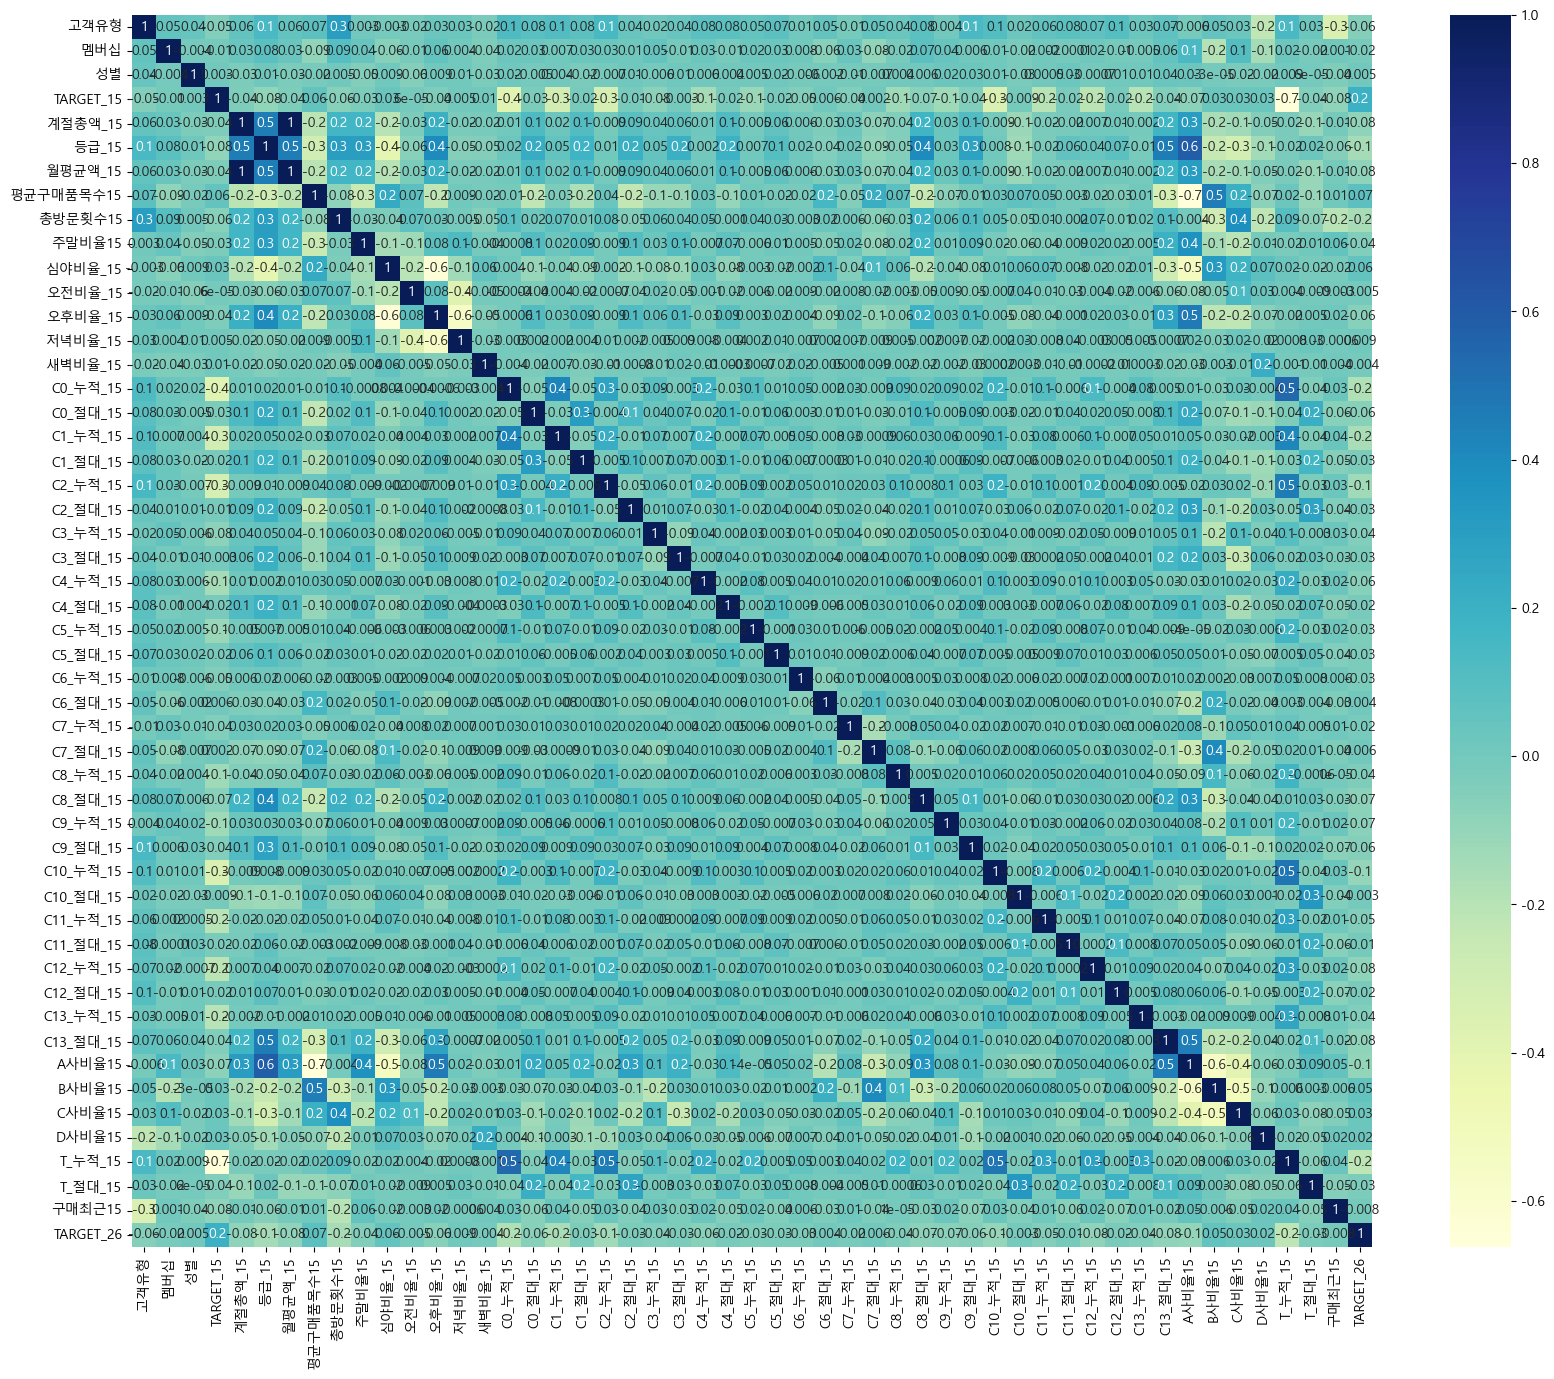

In [15]:
combined_df = pd.concat([df2, df3['TARGET_26']], axis=1)
corr_matrix = combined_df.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix , annot=True, fmt='.1g', cmap='YlGnBu')
# corr.TARGET_15.sort_values(ascending=True)

In [35]:
# 1~5기 데이터
xtrain = df2.drop('TARGET_26',axis=1)
ytrain = df2['TARGET_26']

# 6기 데이터
xtest = df4.drop('TARGET_37',axis=1)
ytest = df4['TARGET_37']

In [36]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(xtrain, ytrain), (xtest, ytest)]
lgbm_wrapper.fit(xtrain, ytrain, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(xtest)
pred_proba = lgbm_wrapper.predict_proba(xtest)[:, 1]

[1]	training's binary_logloss: 0.643751	valid_1's binary_logloss: 0.658616
[2]	training's binary_logloss: 0.639208	valid_1's binary_logloss: 0.654696
[3]	training's binary_logloss: 0.63509	valid_1's binary_logloss: 0.651139
[4]	training's binary_logloss: 0.631231	valid_1's binary_logloss: 0.647913
[5]	training's binary_logloss: 0.627687	valid_1's binary_logloss: 0.644942
[6]	training's binary_logloss: 0.624448	valid_1's binary_logloss: 0.642316
[7]	training's binary_logloss: 0.62138	valid_1's binary_logloss: 0.639829
[8]	training's binary_logloss: 0.618456	valid_1's binary_logloss: 0.637607
[9]	training's binary_logloss: 0.615815	valid_1's binary_logloss: 0.635497
[10]	training's binary_logloss: 0.613277	valid_1's binary_logloss: 0.63352
[11]	training's binary_logloss: 0.610904	valid_1's binary_logloss: 0.631865
[12]	training's binary_logloss: 0.608644	valid_1's binary_logloss: 0.630223
[13]	training's binary_logloss: 0.606538	valid_1's binary_logloss: 0.628815
[14]	training's binary_l

[127]	training's binary_logloss: 0.516713	valid_1's binary_logloss: 0.607069
[128]	training's binary_logloss: 0.51623	valid_1's binary_logloss: 0.6071
[129]	training's binary_logloss: 0.515746	valid_1's binary_logloss: 0.607096
[130]	training's binary_logloss: 0.515129	valid_1's binary_logloss: 0.60703
[131]	training's binary_logloss: 0.514622	valid_1's binary_logloss: 0.607066
[132]	training's binary_logloss: 0.514252	valid_1's binary_logloss: 0.607045
[133]	training's binary_logloss: 0.513695	valid_1's binary_logloss: 0.607116
[134]	training's binary_logloss: 0.513327	valid_1's binary_logloss: 0.607176
[135]	training's binary_logloss: 0.512884	valid_1's binary_logloss: 0.607244
[136]	training's binary_logloss: 0.51229	valid_1's binary_logloss: 0.607236
[137]	training's binary_logloss: 0.511798	valid_1's binary_logloss: 0.607325
[138]	training's binary_logloss: 0.511318	valid_1's binary_logloss: 0.607353
[139]	training's binary_logloss: 0.510811	valid_1's binary_logloss: 0.607367
[140

In [37]:
def get_clf_eval(ytest, pred=None, pred_proba=None):
    confusion = confusion_matrix( ytest, pred)
    accuracy = accuracy_score(ytest , pred)
    precision = precision_score(ytest , pred)
    recall = recall_score(ytest , pred)
    f1 = f1_score(ytest,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(ytest, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [38]:
get_clf_eval(ytest, preds, pred_proba)

오차 행렬
[[ 2104  5178]
 [ 1307 10794]]
정확도: 0.6654, 정밀도: 0.6758, 재현율: 0.8920,    F1: 0.7690, AUC:0.6847


In [37]:
dataset =  df2.copy() # 1-5분기 
dataset2 = df3.copy() # 6분기
dataset3 = df4.copy() # 2-6분기
dataset4 = df5.copy() # 7분기


In [ ]:
dataset5 = df6.copy() # 3-7분기
dataset6 = df7.copy() # 8분기

In [17]:
X_train = dataset

y_train = dataset2

X_validation = dataset3

y_validation = dataset4

In [ ]:

X_test = dataset5

y_test = dataset6

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the parameter grid
param_grid = {
    'penalty': [ 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the logistic regression model
logreg = LogisticRegression()

# Create the scaler for feature scaling
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(xtrain)

# Create the grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs = -1)

# Perform grid search to find the best model
grid_search.fit(X_train_scaled, ytrain)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best Hyperparameters:
C: 10.0
max_iter: 200
penalty: l2
solver: saga


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=100)
logreg.fit(X_train_scaled, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = logreg.score(X_validation_scaled, y_validation)



# 검증 데이터셋 예측 확률 계산
validation_probabilities = logreg.predict_proba(X_validation_scaled)
print("Validation Predicted Probabilities:")
print(validation_probabilities)

# 검증 데이터셋 정확도 계산
validation_accuracy = logreg.score(X_validation_scaled, y_validation)
print("Validation Accuracy:", validation_accuracy)


Validation Predicted Probabilities:
[[0.56843674 0.43156326]
 [0.65260597 0.34739403]
 [0.27029871 0.72970129]
 ...
 [0.06889628 0.93110372]
 [0.08776921 0.91223079]
 [0.19908975 0.80091025]]
Validation Accuracy: 0.6503121291853686


In [28]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(X_train, y_train), (X_validation, y_validation )]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_validation)
pred_proba = lgbm_wrapper.predict_proba(X_validation)[:, 1]

[1]	training's binary_logloss: 0.643751	valid_1's binary_logloss: 0.658109
[2]	training's binary_logloss: 0.639149	valid_1's binary_logloss: 0.654069
[3]	training's binary_logloss: 0.635024	valid_1's binary_logloss: 0.650501
[4]	training's binary_logloss: 0.631212	valid_1's binary_logloss: 0.647748
[5]	training's binary_logloss: 0.627688	valid_1's binary_logloss: 0.644751
[6]	training's binary_logloss: 0.624442	valid_1's binary_logloss: 0.642714
[7]	training's binary_logloss: 0.621381	valid_1's binary_logloss: 0.640567
[8]	training's binary_logloss: 0.618468	valid_1's binary_logloss: 0.638673
[9]	training's binary_logloss: 0.615814	valid_1's binary_logloss: 0.637136
[10]	training's binary_logloss: 0.613356	valid_1's binary_logloss: 0.636051
[11]	training's binary_logloss: 0.610997	valid_1's binary_logloss: 0.634711
[12]	training's binary_logloss: 0.608759	valid_1's binary_logloss: 0.633534
[13]	training's binary_logloss: 0.606596	valid_1's binary_logloss: 0.632748
[14]	training's binar

In [29]:
def get_clf_eval(ytest, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_validation, pred)
    accuracy = accuracy_score(y_validation , pred)
    precision = precision_score(y_validation , pred)
    recall = recall_score(y_validation , pred)
    f1 = f1_score(y_validation ,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_validation, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [30]:
get_clf_eval(y_validation, preds, pred_proba)

오차 행렬
[[2655 4627]
 [2234 9867]]
정확도: 0.6460, 정밀도: 0.6808, 재현율: 0.8154,    F1: 0.7420, AUC:0.6661


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

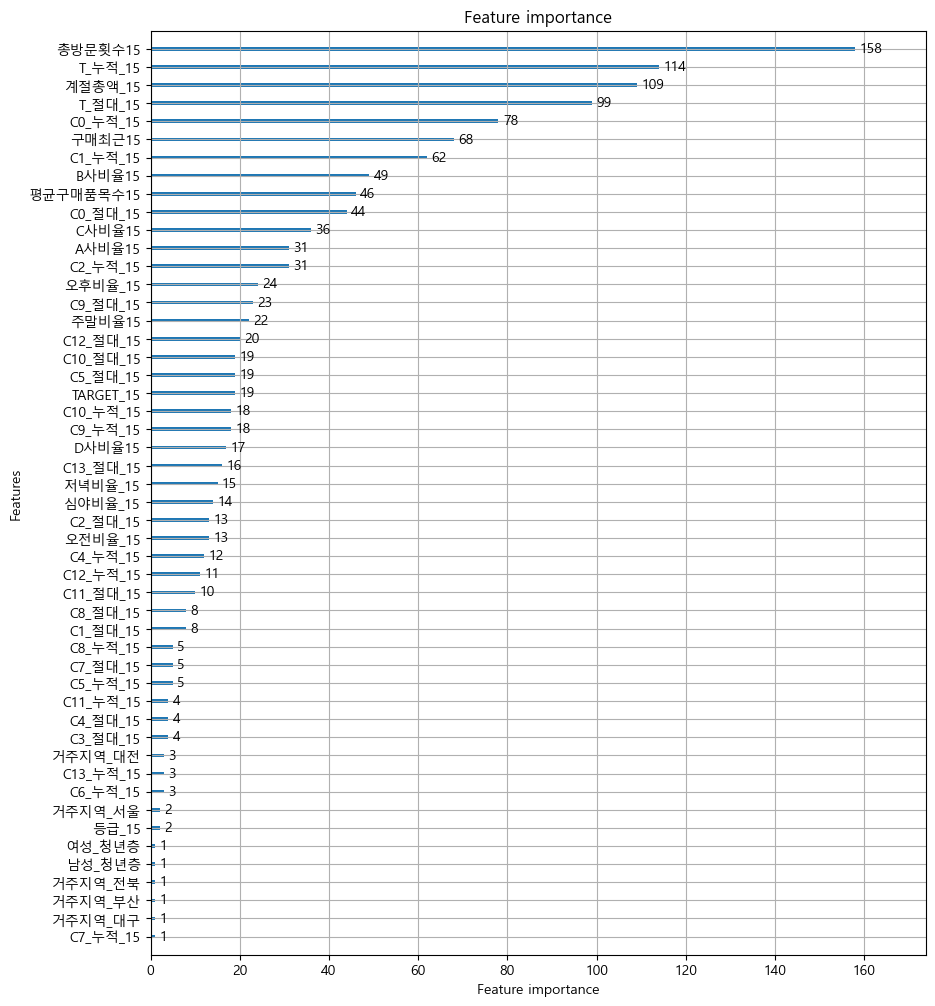

In [31]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

In [32]:
from sklearn.tree import DecisionTreeClassifier

# 트리 분류 모델 생성
tree = DecisionTreeClassifier()

# 모델 학습
tree.fit(X_train, y_train)

# 검증 데이터셋 예측
y_pred = tree.predict(X_validation)

# 검증 데이터셋에서의 정확도 평가
accuracy = tree.score(X_validation, y_validation)

print("검증 데이터셋 예측 결과:", y_pred)
print("정확도:", accuracy)


검증 데이터셋 예측 결과: [0 1 1 ... 1 1 1]
정확도: 0.5465614198008564


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 트리 분류 모델 생성
tree = DecisionTreeClassifier()

# 탐색할 매개변수 그리드 생성
param_grid = {
    'criterion': ['gini', 'entropy'],  # 분류 기준
    'max_depth': [None, 5, 10],  # 최대 깊이
    'min_samples_split': [2, 5, 10]  # 분할을 위한 최소 샘플 수
}

# GridSearchCV를 사용하여 규제 매개변수 탐색
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

# 최적의 매개변수 및 성능 결과 출 력
print("최적의 매개변수:", grid_search.best_params_)
print("최고 성능:", grid_search.best_score_)


최적의 매개변수: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
최고 성능: 0.6660485097341816


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 트리 분류 모델 생성
tree = DecisionTreeClassifier()

# 탐색할 매개변수 그리드 생성
param_grid = {
    'criterion': ['gini', 'entropy'],  # 분류 기준
    'max_depth': [None, 5, 10],  # 최대 깊이
    'min_samples_split': [2, 5, 10]  # 분할을 위한 최소 샘플 수
}

# GridSearchCV를 사용하여 규제 매개변수 탐색
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 매개변수
best_params = grid_search.best_params_
print("최적의 매개변수:", best_params)

# 최적의 매개변수로 모델 생성 및 학습
tree = DecisionTreeClassifier(**best_params)
tree.fit(X_train, y_train)

# 검증 데이터셋 예측
y_pred = tree.predict(X_validation)

# 검증 데이터셋에서의 정확도 평가
accuracy = tree.score(X_validation, y_validation)

print("검증 데이터셋 예측 결과:", y_pred)
print("정확도:", accuracy)


최적의 매개변수: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
검증 데이터셋 예측 결과: [0 1 1 ... 1 1 1]
정확도: 0.6372594541608626


군집

In [37]:
import pandas as pd

# 검증 데이터셋의 입력 변수를 데이터 프레임으로 생성
validation_df = pd.DataFrame(X_validation, columns=X_validation.columns)

# 검증 데이터셋 예측결과를 원본 데이터 프레임에 추가
df['Prediction'] = logreg.predict(X_validation_scaled)

# 검증 데이터셋 예측 결과를 포함한 데이터 프레임 출력
df.head()


,고객번호,성별,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,TARGET_48,계절총액_15,...,거주지역_충북,남성_중년층,여성_중년층,남성_노년층,여성_노년층,남성_학생층,여성_학생층,남성_청년층,여성_청년층,Prediction
0,1,0,1,1,15.0,1,0,0,0,6.309726e+07,...,0,0,0,1,0,0,0,0,0,0
1,2,0,1,1,8.0,1,1,1,1,6.526469e+07,...,0,0,0,1,0,0,0,0,0,0
2,3,0,1,1,0.0,1,0,0,0,2.185141e+06,...,0,0,0,1,0,0,0,0,0,1
3,4,1,1,1,3.0,1,0,0,0,1.109015e+07,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,0,0.0,0,0,0,1,9.912117e+06,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# 'Prediction'이 0인 경우만 남기기
df_filtered = df[df['Prediction'] == 0]


In [39]:
df_filtered.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,TARGET_48,계절총액_15,...,거주지역_충북,남성_중년층,여성_중년층,남성_노년층,여성_노년층,남성_학생층,여성_학생층,남성_청년층,여성_청년층,Prediction
0,1,0,1,1,15.0,1,0,0,0,6.309726e+07,...,0,0,0,1,0,0,0,0,0,0
1,2,0,1,1,8.0,1,1,1,1,6.526469e+07,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,1,3.0,1,0,0,0,1.109015e+07,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,0,0.0,0,0,0,1,9.912117e+06,...,0,0,0,1,0,0,0,0,0,0
5,6,1,1,1,0.0,1,0,1,1,1.507443e+07,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기 그냥 df
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_filtered)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [ ]:
visualize_silhouette([2,3,4,5,6,7],df_filtered)
visualize_kmeans_plot_multi([2,3,4,5,6,7],df_filtered)

In [ ]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_filtered) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_filtered) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10]) 
# 군집을 나누는 걸 학습시켯다 이제 원본에 넣어보자

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=200)
logreg.fit(X_train_scaled, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = logreg.score(X_validation_scaled, y_validation)



# 검증 데이터셋 예측 확률 계산
validation_probabilities = logreg.predict_proba(X_validation_scaled)
print("Validation Predicted Probabilities:")
print(validation_probabilities)

# 검증 데이터셋 정확도 계산
validation_accuracy = logreg.score(X_validation_scaled, y_validation)
print("Validation Accuracy:", validation_accuracy)


NameError: name 'X_train' is not defined